# 2. Exploratory Data Analysis (EDA) & Modeling

## Goal
Visualize the data to find patterns and train a Machine Learning model to predict Churn.

## Steps
1. **EDA**: Visualize Churn vs. Tenure and Monthly Charges.
2. **Preprocessing**: Convert categorical text data into numbers (One-Hot Encoding).
3. **Model Training**: Train a Random Forest Classifier on 80% of the data.
4. **Evaluation**: Test the model on the remaining 20% to check accuracy.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('../data/processed/telco_churn_cleaned.csv')

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [2]:
df.shape

(7032, 20)

In [7]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce') 
df['tenure'].isnull().sum()

np.int64(0)

In [10]:
def group_tenure(tenure):
    if tenure<12: 
        return '0-1 Year'
    elif tenure <= 24:
        return '1-2 Years'
    elif tenure <= 48:
        return '2-4 Years'
    else:
        return '4+ Years'

df["TenureGroup"]= df["tenure"].apply(group_tenure)
print(df['TenureGroup'].value_counts())

TenureGroup
4+ Years     2239
0-1 Year     2058
2-4 Years    1594
1-2 Years    1141
Name: count, dtype: int64


In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Year
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-4 Years
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Year
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2-4 Years
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Year


## Exploratory Data Analysis
Visualizing key factors that drive churn.

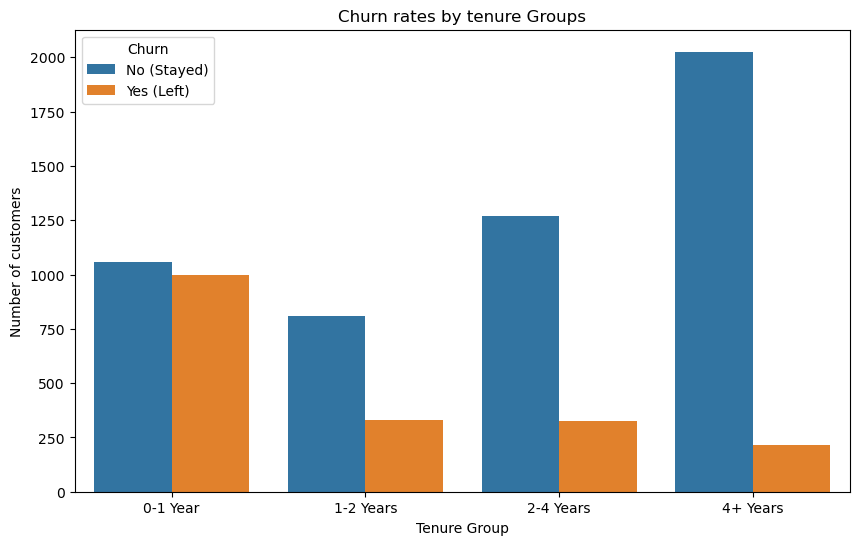

In [12]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='TenureGroup', hue="Churn", order=['0-1 Year', '1-2 Years', '2-4 Years', '4+ Years'])

plt.title("Churn rates by tenure Groups")
plt.ylabel("Number of customers")
plt.xlabel("Tenure Group")
plt.legend(title='Churn', labels=['No (Stayed)', 'Yes (Left)'])
plt.show()

In [13]:
# Converting categorical variables into dummy/indicator variables
df_dummies = pd.get_dummies(df, drop_first=True)

# Checking the new shape
print(f"Original Shape: {df.shape}")
print(f"New Shape (Encoded): {df_dummies.shape}")

Original Shape: (7032, 21)
New Shape (Encoded): (7032, 34)


In [15]:
df_dummies.head(20)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2 Years,TenureGroup_2-4 Years,TenureGroup_4+ Years
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
5,0,8,99.65,820.50,1,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False
6,0,22,89.10,1949.40,0,True,False,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False
7,0,10,29.75,301.90,0,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
8,0,28,104.80,3046.05,1,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False
9,0,62,56.15,3487.95,0,True,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


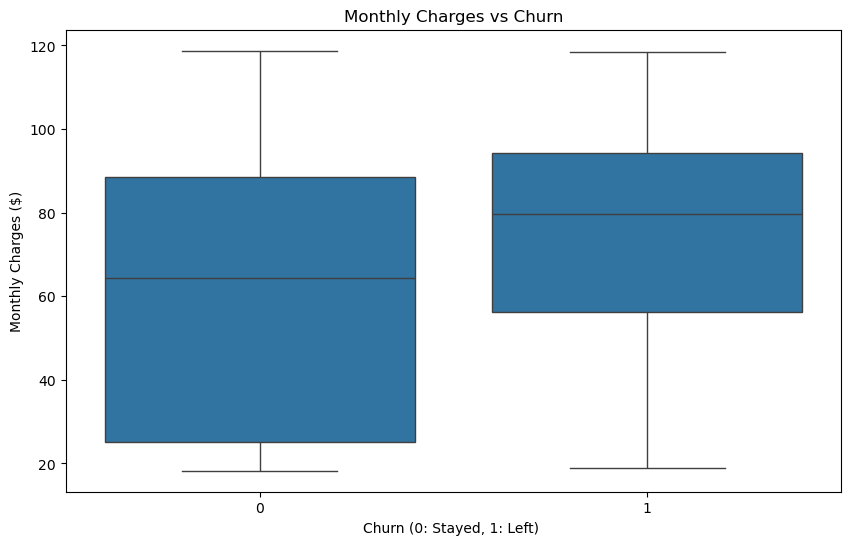

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")

plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn (0: Stayed, 1: Left) ")
plt.ylabel("Monthly Charges ($)")
plt.show()

## Machine Learning
Training a Random Forest Classifier.
- **Accuracy Goal**: > 75%
- **Algorithm**: Random Forest (Ensemble of Decision Trees)

In [22]:
from sklearn.model_selection import train_test_split

# We drop 'Churn' from X because that's the answer!
X= df_dummies.drop(columns=["Churn"])
y= df_dummies['Churn']

# Splitting the data
# test_size=0.2 means "Keep 20% for the exam"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Verifying the splits
print(f"Training files: {X_train.shape[0]}")
print(f"Testing files: {X_test.shape[0]}")

Training files: 5625
Testing files: 1407


In [23]:
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)
print("Training Complete! The model has learned the patterns.")

Training Complete! The model has learned the patterns.


In [24]:
# Generating predictions for the test set
y_pred= model_rf.predict(X_test)

print(y_pred[:10])

[0 0 1 0 0 0 0 1 0 0]


Model Acuuracy: 77.90%

 Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.61      0.46      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



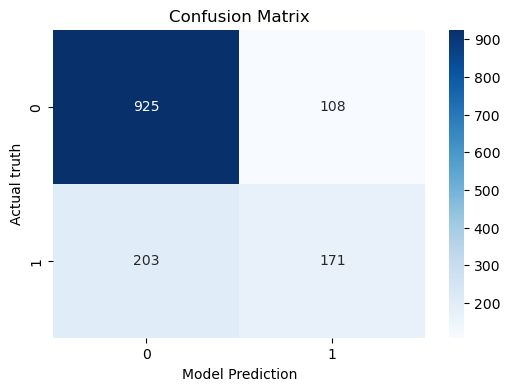

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Calculating Acuuracy
accuracy= accuracy_score(y_test, y_pred)
print(f"Model Acuuracy: {accuracy:.2%}")

#Detailed report 
print("\n Classification Report")
print(classification_report(y_test, y_pred))

#Confusion matrix 
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual truth")
plt.xlabel("Model Prediction")
plt.show()

In [26]:
import joblib

joblib.dump(model_rf, 'churn_model.pkl')
model_columns= list(X.columns)
joblib.dump(model_columns, 'model-columns.pkl')

print("Model saved successfully as 'churn_model.pkl'!")

Model saved successfully as 'churn_model.pkl'!
